In [2]:
#在未归一化时，其zhun'que
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
def readData(fileName):
#     fileName = 'C:/Users/Administrator/Desktop/机器学习实战代码/MLiA_SourceCode/Ch02/datingTestSet.txt'
    file = open(fileName)
    dataSet = []
    labelSet = []
    for content in file.readlines():
        cure = content.split()
        dataSet.append([float(num) for num in cure[0:-1]])
        labelSet.append(cure[-1])
    return dataSet,labelSet

In [76]:
def Dist(X,Y):
    X = np.array(X)
    Y = np.array(Y)
    return np.sqrt(np.sum(np.square(X-Y)))

In [77]:
#由于值越大对结果的影响越大，因而进行归一化
def normalization(X):
    X = np.array(X)
    X_min = np.min(X)
    X_max = np.max(X)
    X_norm = (X-X_min)/(X_max-X_min)
    return X_norm

In [78]:
def predict(datas,labels,test,k):
    distinction = []
    pre = []
    times = []
    for data in datas:
        distinction.append(Dist(data,test))
    sortIndex = np.argsort(np.array(distinction))
    for index in sortIndex[:k]:
        pre.append(labels[index])
    #np.unique()用来去除重复的元素
    lab = np.unique(np.array(pre))
    for i in range(0,len(lab)):
        times.append(len(labels[labels==lab[i]]))
    frequent = np.argmax(np.array(times))
    return lab[frequent]

In [129]:
def estimate(train,test,tr_label,te_label):
    error = 0
    plt.scatter(train[tr_label=='largeDoses'][:,1],train[tr_label=='largeDoses'][:,2],c='r')
    plt.scatter(train[tr_label=='smallDoses'][:,1],train[tr_label=='smallDoses'][:,2],c='g')
    plt.scatter(train[tr_label=='didntLike'][:,1],train[tr_label=='didntLike'][:,2],c='b')
    for i in range(len(test)):
        if te_label[i] != predict(train,tr_label,test[i],1):
            error += 1
            plt.scatter(test[i][1],test[i][2],c='y')
    plt.show()
    return 1-error/len(test)

In [130]:
fileName = 'C:/Users/Administrator/Desktop/机器学习实战代码/MLiA_SourceCode/Ch02/datingTestSet.txt'
dataSet,labelSet = readData(fileName)
dataSet = np.array(dataSet)
dataNorm = np.copy(dataSet)
labelSet = np.array(labelSet)
for i in range(dataSet.shape[1]):
    dataNorm[:,i] = normalization(dataSet[:,i])

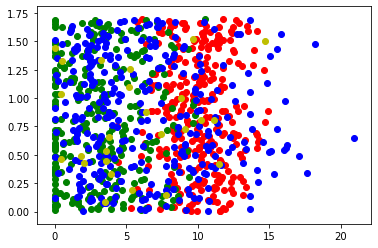

0.75

In [131]:
trainSet = np.copy(dataSet)[:int(0.9*dataSet.shape[0])]
testSet = np.copy(dataSet)[int(0.9*dataSet.shape[0]):]
trainLabel = np.copy(labelSet)[:int(0.9*len(labelSet))]
testLabel = np.copy(labelSet)[int(0.9*len(labelSet)):]
estimate(trainSet,testSet,trainLabel,testLabel)